In [4]:
import pandas as pd
import ast

In [3]:
from groq import Groq

client = Groq(
    api_key="your_api_key",
)

In [ ]:
df = []

In [5]:
df = pd.read_csv("C:/Users/Rajesh/Downloads/food2.csv")
tst = df.head()

In [75]:
df.isnull().sum()

Alcohol value               0
Methane value               0
Temperature                 8
Humidity                    0
Food Condition              0
Life Expectancy             0
Estimated Ethylene Level    0
dtype: int64

In [21]:
(tst)

,Alcohol value,Methane value,Temperature,Humidity,Food Condition,Life Expectancy,Estimated Ethylene Level
0,440.0,435.0,42.0,46.0,Spoiled,2.380952,100
1,370.0,380.0,35.0,40.0,Unspoiled,8.333333,29
2,405.0,410.0,40.0,43.0,Unspoiled,5.263158,14
3,345.0,355.0,32.0,39.0,Unspoiled,10.526316,42
4,430.0,420.0,41.0,45.0,Spoiled,2.857143,100


In [15]:
# Process CSV 

def process_csv () :
    # global df
    # path = ""
    # df = pd.read_csv(path)
    chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": f"This is the dataset i have : {tst} , explain and summarize it in 2 lines" ,
        }
    ],
    model="llama3-8b-8192",
    )
    response_text = chat_completion.choices[0].message.content
    print(response_text)


In [56]:
# PreProcessing

chat_completion = client.chat.completions.create(
messages=[
    {
        "role": "user",
        "content": f"This is the dataset i have : {tst} , give a code to remove null values from the temperature column also call it , give code only dont give explanation , do all in inplace so that it updates in realtime" ,
    }
],
model="llama3-8b-8192",
)
response_text = chat_completion.choices[0].message.content
print(response_text)


Here is the code:
```
df['Temperature'].dropna(inplace=True)
```


In [35]:
# PreProcessing

chat_completion = client.chat.completions.create(
messages=[
    {
        "role": "user",
        "content": f"This is the dataset i have : {tst} , give a code to remove null values from the temperature column also call it , give code only dont give explanation , do all in inplace so that it updates in realtime" ,
    }
    
],
model="llama3-8b-8192",
)
# print
response_text = chat_completion.choices[0].message.content
print(response_text)


"Temperature Null Values Successfully Removed!"

"The dataset is now null-free!"


In [39]:
chat_completion

ChatCompletion(choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChoiceMessage(content='"Temperature Null Values Successfully Removed!"\n\n"The dataset is now null-free!"', role='assistant', tool_calls=None))], id='chatcmpl-79f383fc-d42b-4efa-bba8-1dfcc23f273e', created=1716789899, model='llama3-8b-8192', object='chat.completion', system_fingerprint='fp_c5f20b5bb1', usage=Usage(completion_time=0.014896038, completion_tokens=14, prompt_time=0.07560093, prompt_tokens=282, queue_time=None, total_time=0.090496968, total_tokens=296), x_groq={'id': 'req_01hywadw0dfxctcg1dkc5471sc'})

In [81]:
df.describe()

,Alcohol value,Methane value,Temperature,Humidity,Life Expectancy,Estimated Ethylene Level
count,96.000000,96.000000,88.000000,96.000000,96.000000,96.000000
mean,381.076771,405.834167,37.995227,41.961042,4.428997,67.052083
std,47.857808,25.502710,4.069199,4.354884,2.514535,36.469272
min,304.910000,351.080000,30.130000,35.020000,1.000000,14.000000
25%,334.890000,386.400000,34.967500,38.267500,2.000000,28.750000
50%,381.660000,406.890000,38.350000,42.000000,4.000000,100.000000
75%,419.037500,425.065000,41.015000,45.760000,6.000000,100.000000
max,468.360000,449.730000,44.990000,49.890000,11.000000,100.000000


In [82]:
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Alcohol value             96 non-null     float64
 1   Methane value             96 non-null     float64
 2   Temperature               88 non-null     float64
 3   Humidity                  96 non-null     float64
 4   Food Condition            96 non-null     object 
 5   Life Expectancy           96 non-null     float64
 6   Estimated Ethylene Level  96 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 5.4+ KB


In [88]:
# Suggessions

chat_completion = client.chat.completions.create(
messages=[
    {
        "role": "user",
        "content": f"I'm working on preprocessing a DataSet ,  This is the dataset i have : {tst} and its info : {info},give me 3 suggests to what to do further in 3 lines" ,
    }
],
model="llama3-8b-8192",
)
response_text = chat_completion.choices[0].message.content
print(response_text)


You're working on preprocessing a dataset!

Here are three suggestions for what you could do next:

1. **Data Exploration**: Look for correlations and patterns in your data using techniques like scatter plots, heatmaps, or correlation matrices. This will help you understand the relationships between your variables and identify potential issues, such as missing values or outliers.
2. **Handling Missing Values**: Since you didn't mention anything about missing values, you might want to investigate how to handle them. You could decide to impute missing values using a mean, median, or interpolation technique, or even remove the rows with missing values altogether if they're not too crucial to your analysis.
3. **Data Transformation**: Some of your variables, like Life Expectancy and Estimated Ethylene Level, seem to be continuous or categorical variables, while others, like Food Condition and Humidity, are likely categorical variables. You might want to consider converting these variables 

In [104]:
# Search DATASET ...,

chat_completion = client.chat.completions.create(
messages=[
    {
        "role": "user",
        "content": f"I need a dataset for House Prize Prediction , Provide me top 5 links to download the dataset" ,
    }
],
model="llama3-8b-8192",
)
response_text = chat_completion.choices[0].message.content
print(response_text)


2024-05-26 23:25:36.471 HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


Here are the top 5 links to download a dataset for House Prize Prediction:

**1. Kaggle - House Prices**

* Dataset source: Kaggle (Competition: House Prices)
* Fields: 13 attributes, including variables like Number of rooms, Flooring, Address, Overall condition, Bathroom size, and more
* Size: 15,841 rows (features: 79)
* Format: CSV
* Download link: [Kaggle - House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

**2. UCI Machine Learning Repository - Boston Housing**

* Dataset source: University of California, Irvine (UCI) Machine Learning Repository
* Fields: 14 attributes, including variables like RM (number of rooms), NOX (nitrogen oxides), and so on
* Size: 506 rows (features: 13)
* Format: CSV (also available in other formats like ARFF, XML)
* Download link: [UCI Machine Learning Repository - Boston Housing](https://archive.ics.uci.edu/ml/datasets/Boston+Housing)

**3. Data Science Bowl 2015 - House Prices**

* Dataset source: Kaggle (Data Sc

In [57]:
response_text

"Here is the code:\n```\ndf['Temperature'].dropna(inplace=True)\n```"

In [61]:
response_text.index("```")

18

In [64]:
response_text[22:61]

"df['Temperature'].dropna(inplace=True)\n"

In [12]:
import re

In [13]:
pattern = r"```(.*?)```"

# Find all matches
matches = re.findall(pattern, response_text, re.DOTALL)

NameError: name 'response_text' is not defined

In [69]:
matches[0]

"\ndf['Temperature'].dropna(inplace=True)\n"

In [16]:
process_csv()

Here is a 2-line summary of your dataset:

This dataset appears to be related to food spoilage, with variables such as alcohol and methane values, temperature, humidity, food condition, life expectancy, and estimated ethylene level potentially influencing the spoilage of food. The dataset contains 5 observations, with conditions ranging from "Spoiled" to "Unspoiled", suggesting that the goal is to develop a predictive model for food spoilage using these variables.


In [50]:
response_text = '```\ndf = df.dropna(subset=["Temperature"],inplace=True)\n```'

In [54]:
response_text[9]

'd'

In [71]:
# Safely parse the response text as a Python AST (Abstract Syntax Tree)
parsed_ast = ast.parse(matches[0])

# else:
# Execute the parsed AST
exec(compile(parsed_ast, filename="<ast>", mode="exec"))

In [52]:
df.isnull().sum()

Alcohol value               0
Methane value               0
Temperature                 0
Humidity                    0
Food Condition              0
Life Expectancy             0
Estimated Ethylene Level    0
dtype: int64

In [9]:
tst

,Alcohol value,Methane value,Temperature,Humidity,Food Condition,Life Expectancy,Estimated Ethylene Level
0,440.0,435.0,42.0,46.0,Spoiled,2.380952,100
1,370.0,380.0,35.0,40.0,Unspoiled,8.333333,29
2,405.0,410.0,40.0,43.0,Unspoiled,5.263158,14
3,345.0,355.0,32.0,39.0,Unspoiled,10.526316,42
4,430.0,420.0,41.0,45.0,Spoiled,2.857143,100


In [32]:
# Visualize 

chat_completion = client.chat.completions.create(
messages=[
    {
        "role": "user",
        # "content": f"This is the dataset i have : {tst} , give a code to visualize column1 and column2 also call it ,mention the column names exactly , give code only dont give explanation " ,
        "content": f"This is the dataset i have : {tst} , give a code to visualize column1 and column2 using matplotlib , also call it ,give the column names exactly as in the dataset give clean code also save the plot as 'plot.png' "
    }
],
model="llama3-8b-8192",
)
viss = chat_completion.choices[0].message.content
print(viss)



Here is the Python code that uses matplotlib to visualize the columns you specified:
```
import matplotlib.pyplot as plt

# assuming your data is in a pandas DataFrame called 'df'

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(df['Alcohol value'], label='Alcohol Value')
plt.title('Alcohol Value vs Index')
plt.xlabel('Index')
plt.ylabel('Alcohol Value')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(df['Methane value'], label='Methane Value')
plt.title('Methane Value vs Index')
plt.xlabel('Index')
plt.ylabel('Methane Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('plot.png')
plt.show()
```
This code creates two subplots in a single figure. The first subplot plots the 'Alcohol value' column, and the second subplot plots the 'Methane value' column. The plot title, x-axis label, and y-axis label are specified for each subplot. The grid is enabled to make it easier to read the values.

After the plot is created, `plt.savefig('plot.png')` is used t

In [31]:
print(matches[0])


import matplotlib.pyplot as plt

# assuming your dataset is in a pandas dataframe called df

plt.figure(figsize=(8, 6))
plt.scatter(df['Alcohol value'], df['Methane value'])
plt.xlabel('Alcohol value')
plt.ylabel('Methane value')
plt.title('Relationship between Alcohol value and Methane value')
plt.show()



In [15]:
viss

'Here is the code in Python using the matplotlib and seaborn libraries to visualize the columns \'Alcohol value\' and \'Methane value\':\n\n```Python\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport pandas as pd\n\n# Assuming your dataset is in a pandas dataframe called \'df\'\nsns.set()\nplt.figure(figsize=(10, 6))\nsns.scatterplot(x=\'Alcohol value\', y=\'Methane value\', data=df)\nplt.title(\'Scatterplot of "Alcohol value" and "Methane value"\')\nplt.xlabel(\'Alcohol value\')\nplt.ylabel(\'Methane value\')\nplt.show()\n```\n\nThis code creates a scatterplot that shows the relationship between the \'Alcohol value\' and \'Methane value\'. You can also use other types of plots or statistics to analyze the data, depending on your needs.\n\nPlease replace \'df\' with your actual dataset. Also, make sure to import necessary libraries and run this code in an environment where matplotlib, seaborn and pandas are installed.\n\nHere\'s how to visualize other columns:\n\n* To vis

In [26]:
viss
pattern = r"```(.*?)```"

# Find all matches
matches = re.findall(pattern, viss, re.DOTALL)

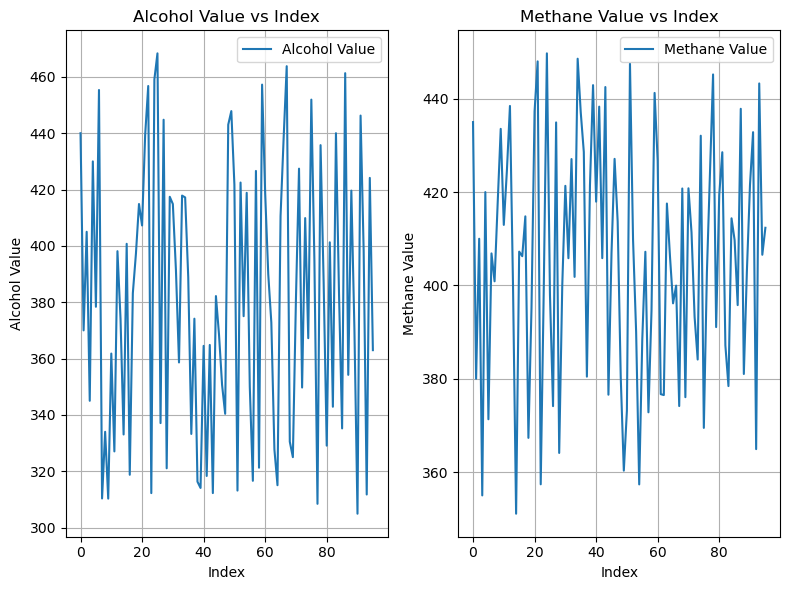

In [33]:
viss
pattern = r"```(.*?)```"

# Find all matches
matches = re.findall(pattern, viss, re.DOTALL)

# Safely parse the response text as a Python AST (Abstract Syntax Tree)
parsed_ast = ast.parse(matches[0])

# else:
# Execute the parsed AST
exec(compile(parsed_ast, filename="<ast>", mode="exec"))

In [99]:
!pip install streamlit

In [101]:
%load_ext streamlit

The streamlit module is not an IPython extension.


In [103]:
%%streamlit


import streamlit as st

# Set page configuration
st.set_page_config(layout="wide")

# Create the layout
col1, col2 = st.columns([3, 1])

# Chat screen
with col1:
    st.title("Chat Screen")
    chat_history = st.empty()

# Input field and send button
with col1:
    input_col1, input_col2 = st.columns([4, 1])
    with input_col1:
        user_input = st.text_input("Enter your message")
    with input_col2:
        if st.button("Send"):
            # Add user's message to the chat history
            chat_history.write(f"You: {user_input}")
            # Clear the input field
            user_input = ""

# Sidebar
with col2:
    st.sidebar.title("Chat History")
    sidebar_history = st.sidebar.empty()

# Drop Dataset button
drop_dataset_button = st.empty()
if drop_dataset_button.button("Drop Dataset", use_container_width=True):
    # Implement the functionality to drop the dataset
    st.write("Dataset dropped successfully!")
    drop_dataset_button.empty()

UsageError: Cell magic `%%streamlit` not found.
